# Example

In [1]:
import numpy as np
import pandas as pd

from SWRsimulation.SWRsimulationCE import SWRsimulationCE


In [2]:
# load Damodaran data from pickle

RETURN_FILE = '../data/histretSP'
def load_returns():
    return pd.read_pickle('%s.pickle' % RETURN_FILE)

download_df = load_returns()
return_df = download_df.iloc[:, [0, 3, 16]]
return_df.columns=['stocks', 'bonds', 'cpi']

return_df


,stocks,bonds,cpi
Year,,,
1928,0.438112,0.032196,-0.011561
1929,-0.082979,0.030179,0.005848
1930,-0.251236,0.005398,-0.063953
1931,-0.438375,-0.156808,-0.093168
1932,-0.086424,0.235896,-0.102740
...,...,...,...
2018,-0.042269,-0.027626,0.019102
2019,0.312117,0.153295,0.022851
2020,0.180232,0.104115,0.013620


In [3]:
# calculate real returns
# should adjust CPI to year-ending also but leave it for now (seems to be annual avg index vs prev year avg)
real_return_df = return_df.copy()
# real_return_df.loc[1948:, 'cpi'] = cpi_test['cpi_fred']
# adjust returns for inflation
real_return_df['stocks'] = (1 + real_return_df['stocks']) / (1 + real_return_df['cpi']) - 1
real_return_df['bonds'] = (1 + real_return_df['bonds']) / (1 + real_return_df['cpi']) - 1
real_return_df.drop('cpi', axis=1, inplace=True)
real_return_df.to_pickle('real_return_df.pickle')

real_return_df

,stocks,bonds
Year,,
1928,0.454932,0.044268
1929,-0.088311,0.024189
1930,-0.200079,0.074090
1931,-0.380674,-0.070178
1932,0.018184,0.377411
...,...,...
2018,-0.060220,-0.045852
2019,0.282803,0.127529
2020,0.164373,0.089279


In [4]:
N_RET_YEARS = 30
FIXED_PCT = 3.5
VARIABLE_PCT = 1.0
FLOOR_PCT = 0.0
ALLOC_STOCKS = 0.75
ALLOC_BONDS = 0.25
GAMMA  = 1.0

s = SWRsimulationCE({
    'simulation': {'returns_df': real_return_df,
                   'n_ret_years': N_RET_YEARS,
                  },
    'allocation': {'asset_weights': np.array([ALLOC_STOCKS, ALLOC_BONDS])}, 
    'withdrawal': {'fixed_pct': FIXED_PCT,
                   'variable_pct': VARIABLE_PCT,
                   'floor_pct': FLOOR_PCT,
                  },
    'evaluation': {'gamma': GAMMA},
    'visualization': {'histogram': True, 
                      'chart_1' : {'title': 'Years to Exhaustion by Retirement Year',
                                   'annotation': "Fixed spend %.1f, Variable spend %.1f, stocks %.1f%%" % (FIXED_PCT, 
                                                                                                           VARIABLE_PCT, 
                                                                                                           100 * ALLOC_STOCKS)
                                  },
                      'chart_2' : {'title': 'Spending By Retirement Year',
                                  },
                      'chart_3' : {'title': 'Portfolio Value By Retirement Year',
                                  },
                     }    
    
})

s.simulate()

print(s)



Simulation:
{'n_asset_years': 95,
 'n_assets': 2,
 'n_ret_years': 30,
 'returns_df':         stocks     bonds
Year                    
1928  0.454932  0.044268
1929 -0.088311  0.024189
1930 -0.200079  0.074090
1931 -0.380674 -0.070178
1932  0.018184  0.377411
...        ...       ...
2018 -0.060220 -0.045852
2019  0.282803  0.127529
2020  0.164373  0.089279
2021  0.199522 -0.057578
2022 -0.229552 -0.196470

[95 rows x 2 columns],
 'trials': <generator object SWRsimulationCE.historical_trials at 0x11e980f20>}

Allocation:
{'asset_weights': array([0.75, 0.25])}

Withdrawal:
{'fixed': 3.5000000000000004,
 'fixed_pct': 3.5,
 'floor': 0.0,
 'floor_pct': 0.0,
 'variable': 0.01,
 'variable_pct': 1.0}


,metric,value
0,mean annual spending over all cohorts,5.19340326
1,mean within-cohort standard deviation of spending,0.63996618
2,lowest annual spending over all cohorts,3.54717646
3,minimum ending portfolio over all cohorts,1.17046905
4,% cohort portfolios exhausted by final year,0.00000000


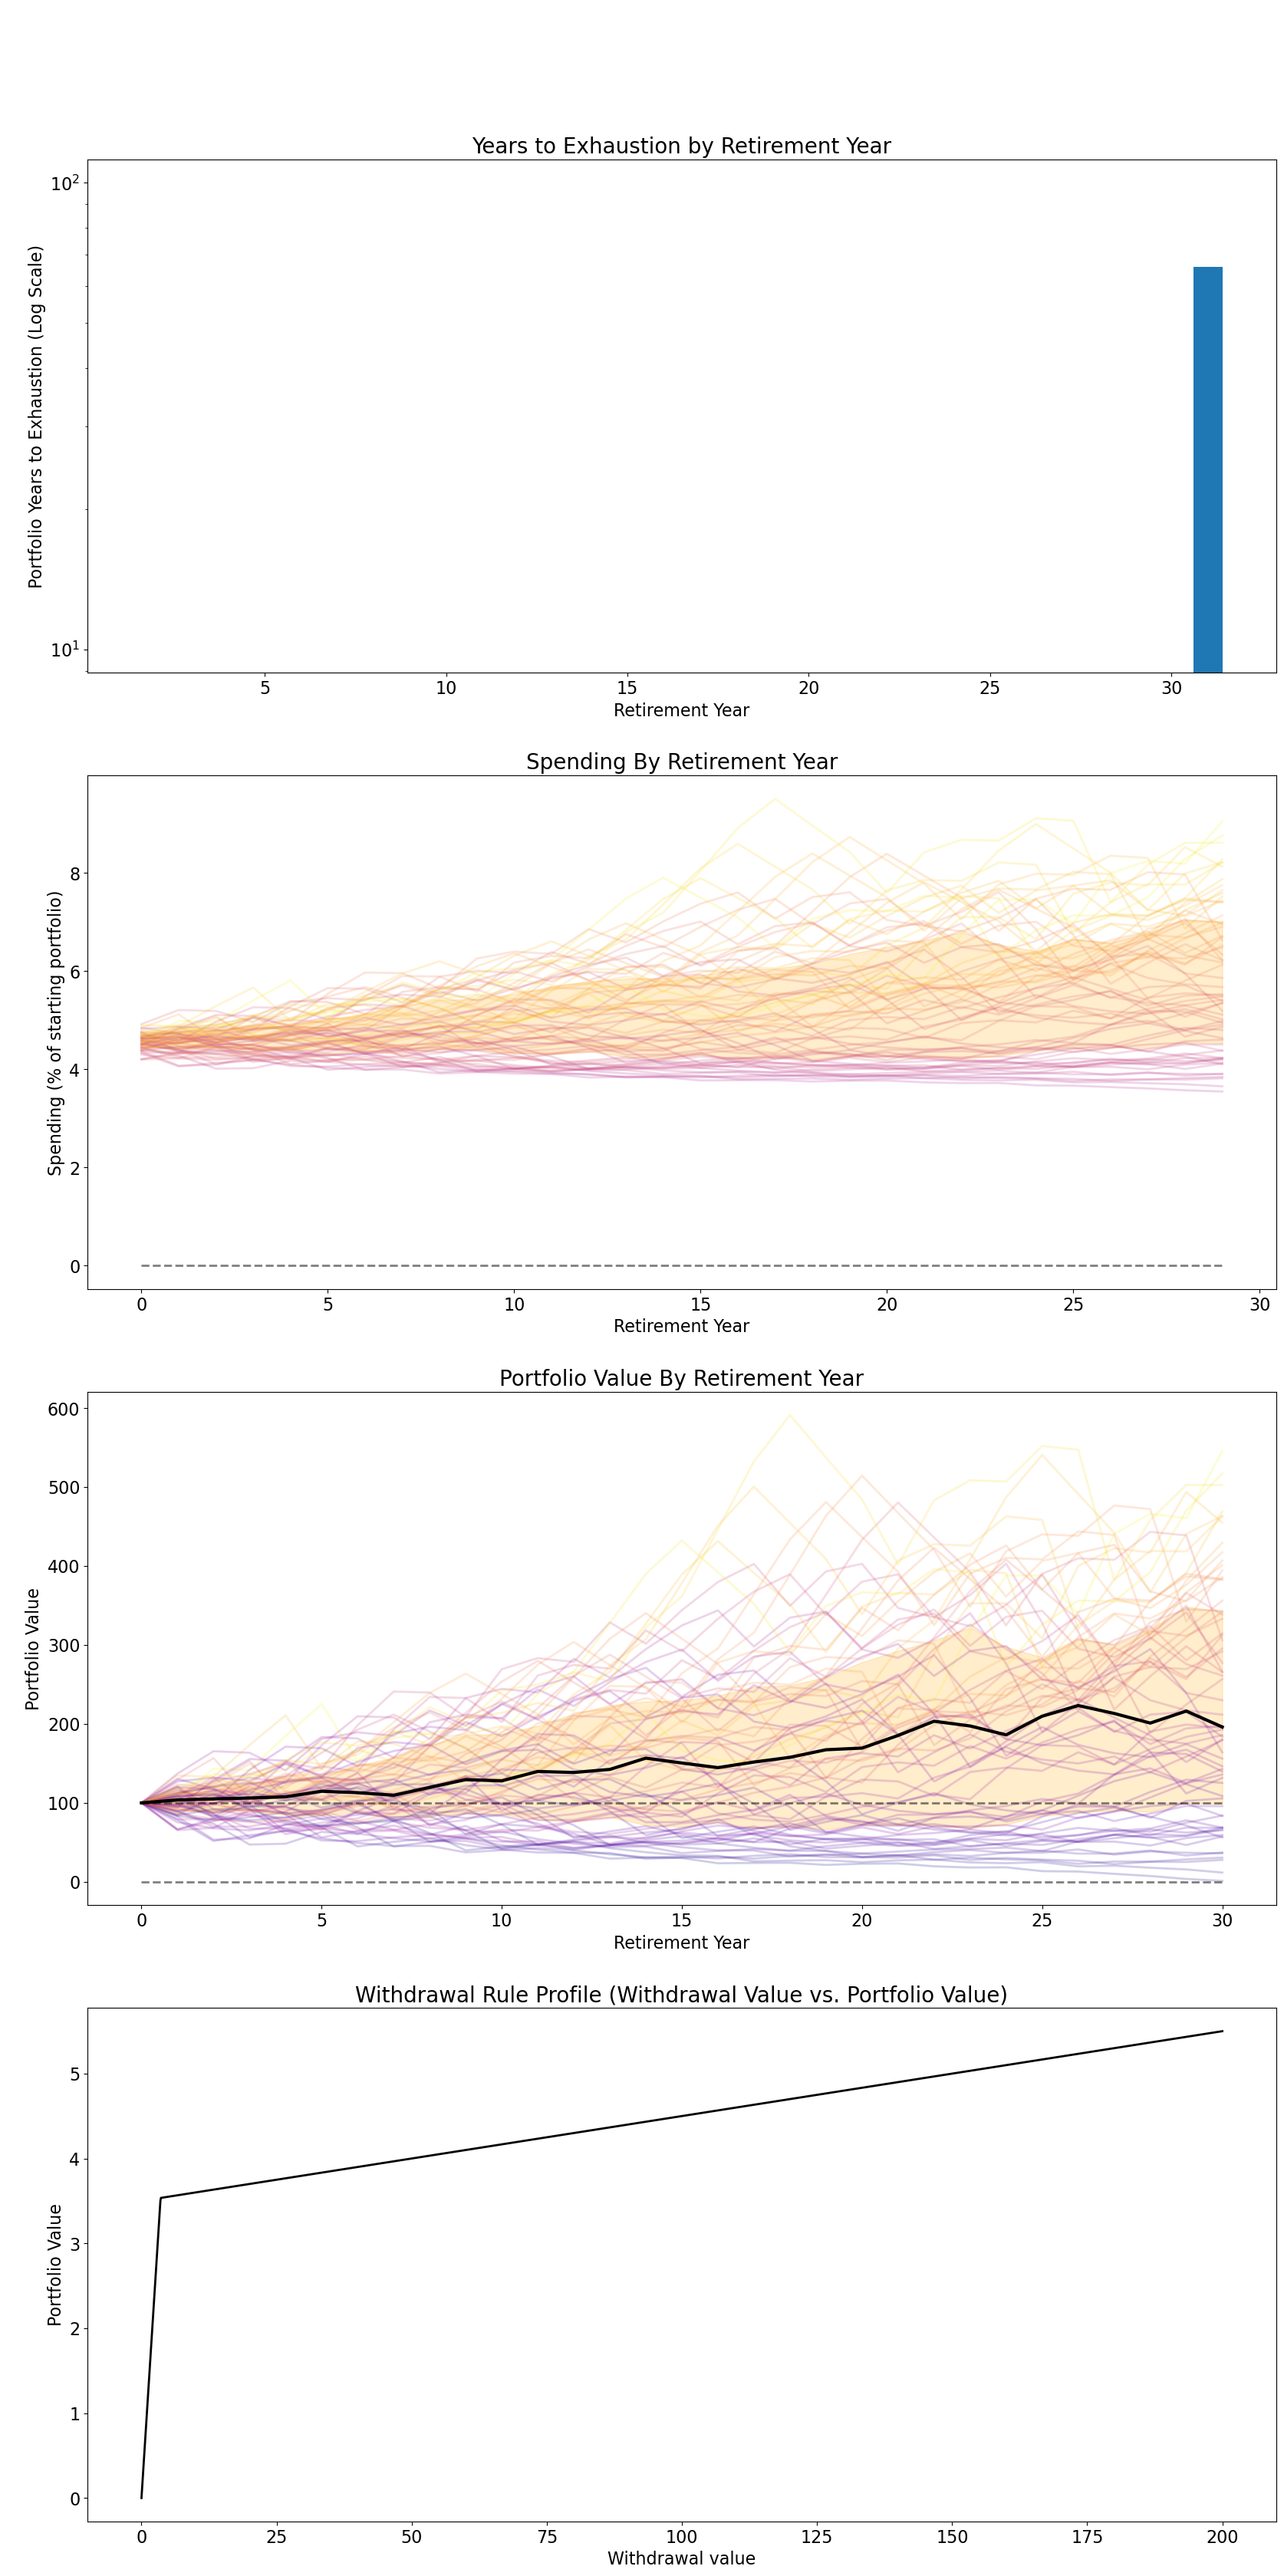

In [5]:
s.visualize()